### Importing Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy.stats as ss
from sklearn import preprocessing

### Reading the datatset

In [2]:
# The data has some discrepency while reading it, thus using separator as ';' while reading
# reading the dataset 
df = pd.read_csv('~/Desktop/secondary_data.csv', sep = ';', encoding = 'utf-8')
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 61069 rows and 21 columns


In [3]:
### Looking at the first 5 rows of the dataset
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


### Exploratory Data Analysis of the dataset

In [4]:
# checking shape of dataset
df.shape

(61069, 21)

In [5]:
# checking datatypes of columns and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
# checking 0 values in all columns
df.all()
# except stem height and width all columns have 0 values

class                    True
cap-diameter             True
cap-shape                True
cap-surface              True
cap-color                True
does-bruise-or-bleed     True
gill-attachment          True
gill-spacing             True
gill-color               True
stem-height             False
stem-width              False
stem-root                True
stem-surface             True
stem-color               True
veil-type                True
veil-color               True
has-ring                 True
ring-type                True
spore-print-color        True
habitat                  True
season                   True
dtype: bool

In [7]:
# checking null values in all columns
df.isnull().sum()
# cap-surface, gill-attachment, gill spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color have null values

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

<AxesSubplot:title={'center':'Count of Null values in all features of the Dataset\n\n\n'}>

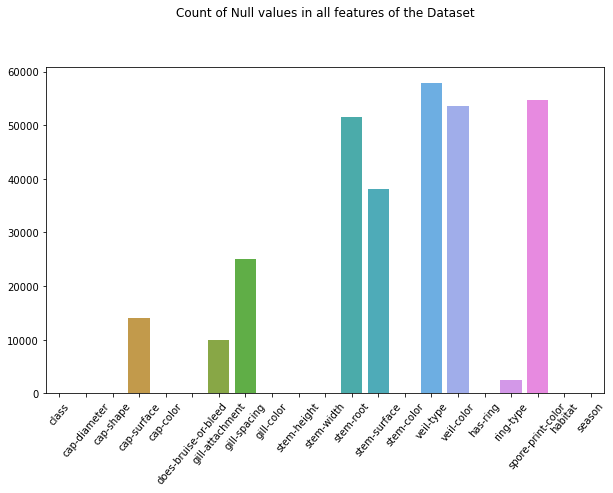

In [8]:
#visualizing the count of null values
listCols = df.isnull().sum() 

plt.figure(figsize=(10, 6))
plt.xticks(rotation=50)
plt.title("Count of Null values in all features of the Dataset\n\n\n")
sns.barplot(x=listCols.index, y=listCols.values)

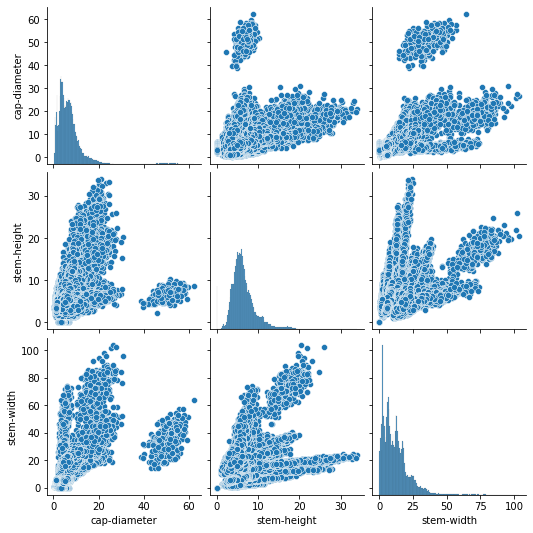

In [9]:
#scatter plot to see multiple pairwise bivariate distributions only for numerical type features
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='class', ylabel='count'>

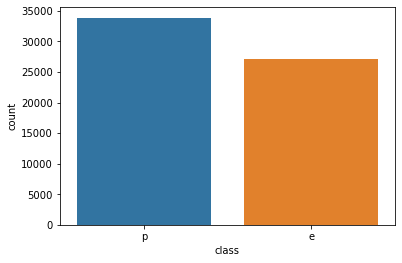

In [10]:
# checking balance between the two class of target variable
sns.countplot(x = df['class'])
# the two class are quite balanced

<Figure size 720x360 with 0 Axes>

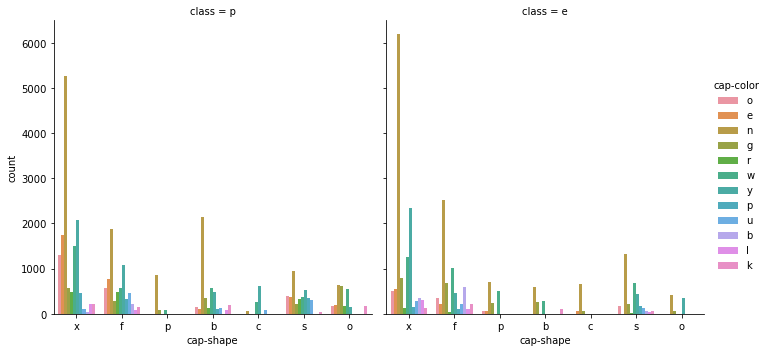

In [12]:
plt.figure(figsize = (10,5))
p = sns.catplot(x="cap-shape", hue="cap-color", col="class",
                data=df, kind="count");

<Figure size 720x360 with 0 Axes>

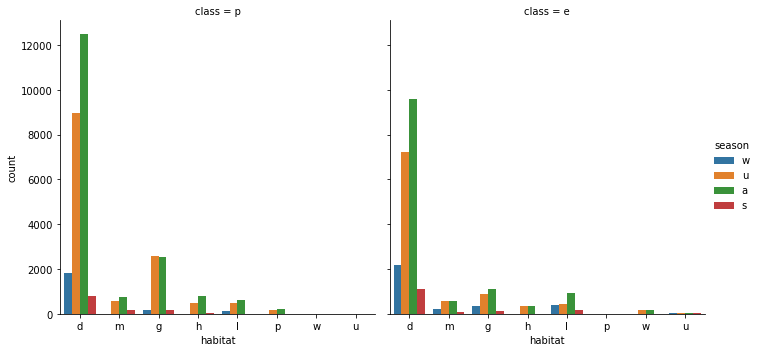

In [13]:
plt.figure(figsize = (10,5))
p = sns.catplot(x="habitat", hue="season", col="class",
                data=df, kind="count");
# in h type habitat during a season mushrooms are highly poisonous
# in d type habitat during a season mushrooms are highly edible

### Handling Missing Values

In [14]:
# function to check the columns which has null values & visualize it

def checkNullValues(df):
    null_info = pd.DataFrame(df.isnull().sum()) # finding number of null values in each feature
    null_info = null_info.reset_index()
    null_info.rename(columns = {'index': 'Column',
                               0: 'Null Values'}, inplace = True) # renaming the columns
    null_info['%_Of_Null_Records'] = round(null_info['Null Values'] / df.shape[0] * 100,2) #finding the percentage of null records    
    
    # visualizing
    plt.figure(figsize=(10,6));
    sns.displot(
        data=df.isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    );
    

<Figure size 720x432 with 0 Axes>

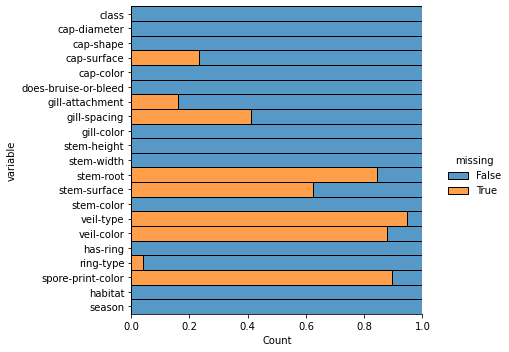

In [15]:
# calling above function
checkNullValues(df)

In [16]:
# From above graph, it can be seen that feature

# 1. **Cap-Surface**
# 2. **Gill-Attachment**
# 3. **Gill-Spacing**
# 4. **Stem-root**
# 5. **Stem-surface**
# 6. **veil-type**
# 7. **veil-color**
# 8. **ring-type**
# 9. **sore-print-color**

# has missing values



<Figure size 720x432 with 0 Axes>

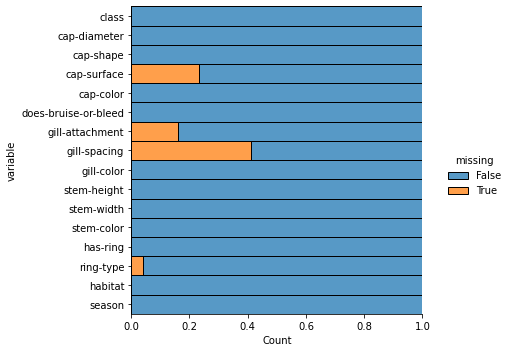

In [17]:
# dropping features that has more than 50% of null records

# NOTE: Keeping gill-spacing for now, to fill missing values of gill-attachment

columns_to_drop = [
    'stem-root',
    'stem-surface',
    'veil-type',
    'veil-color',
    'spore-print-color'
]

df.drop(columns_to_drop, axis = 1, inplace = True)
checkNullValues(df)

In [18]:
# Treating null values "Cap-Surface", "Gill-Attachment", "Gill-Spacing", "Ring-Type"
# Since "ring-type" and "Gill-Attachment" has minimum number of Null reocrds. Treating them first

# Ring Type: Imputing null values by mode of ring-type class

print(df['ring-type'].value_counts())

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64


In [19]:
# since ring-type: 'f' which represents "None"  has the most number of records when compared to other ring-types,imputing null values of ring-type with 'f'
df['ring-type'] = df['ring-type'].fillna(df['ring-type'].mode()[0])

In [20]:
# Gill Attachment
# Checking the value counts of Gill-Attachments 

print(df['gill-attachment'].value_counts())

a    12698
d    10247
x     7413
p     6001
e     5648
s     5648
f     3530
Name: gill-attachment, dtype: int64


In [21]:
# Since gill-attachment type 'a' and 'd' has the highest number of records, imputing missing values with mode of either of 
# them can create Bias for model, as missing values in "gill-attachment" is around 9884 and imputing this with either 
# type - a or type - b will create bias for model as number of records can be spiked up

In [22]:
# Since the number of records are more and cannot be ignored, One best way can be to create another category as "Unknown" and impute missing values of "gill-attachment" with "Unknown"

In [23]:
# Another best way can be to see, how gill attachment is varying with other 2 gill related features
# which are "gill-spacing" and "gill-color"

In [24]:
# "gill-colour" has a lot of categories and comapring it with gill-attachment will create more permutations
print(len(pd.unique(df["gill-color"])))

12


In [25]:
# "gill-spacing" comparatively has lesser categories
print(len(pd.unique(df["gill-spacing"])))

4


In [26]:
# lets see how gill attachment is varying with gill-spacing
print('Checking how Gill-Attachment is varying with Gill-Spacing and Gill-Color')
temp1 = df.groupby([ 'gill-spacing', 'gill-attachment']).size()
temp1 = temp1.reset_index()
temp1.sort_values(by = temp1.columns[-1], ascending = False, inplace = True)
display(temp1)

Checking how Gill-Attachment is varying with Gill-Spacing and Gill-Color


,gill-spacing,gill-attachment,0
1,c,d,6002
4,c,x,4942
0,c,a,4235
10,f,f,3530
3,c,s,2824
5,d,a,2636
2,c,e,2471
6,d,d,1953
8,d,s,1059
9,d,x,1059


In [27]:
# it can be concluded from above dataframe that, when gill-spacing is c then maximum gill-attachment is d
# it can be concluded from above dataframe that, when gill-spacing is f then maximum gill-attachment is f
# it can be concluded from above dataframe that, when gill-spacing is d then maximum gill-attachment is a

<Figure size 720x432 with 0 Axes>

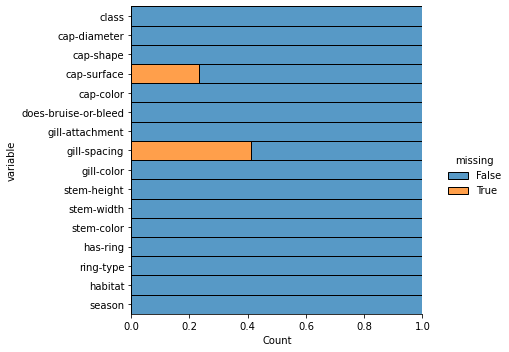

In [28]:
# replacing the above information

df['gill-attachment'] = np.where(((df['gill-spacing'] == 'c')), 
                                 df['gill-attachment'].fillna('d'), 
                                 df['gill-attachment'])

df['gill-attachment'] = np.where(((df['gill-spacing'] == 'f')), 
                                 df['gill-attachment'].fillna('f'), 
                                 df['gill-attachment'])

df['gill-attachment'] = np.where(((df['gill-spacing'] == 'd')), 
                                 df['gill-attachment'].fillna('a'), 
                                 df['gill-attachment'])


# filling rest null values with 'x' as gill spacing itself has few ull values
df['gill-attachment'] = df['gill-attachment'].fillna('x')

checkNullValues(df)


In [29]:
# Gill Spacing
# dropping gill-spacing column as nearly about 40% of data is missing</b>
df.drop(columns = 'gill-spacing', inplace = True)

In [30]:
# Cap Surface
# Teating null values of Cap Surface 
# Assumption is cap surface hugely depend on Cap color and Cap Shape

In [31]:
print(len(pd.unique(df["cap-color"])))
print(len(pd.unique(df["cap-shape"])))

12
7


In [32]:
# since there a lot of cap - color, looking at relation of cap-shape and cap-surface only

In [33]:
print("Checking how cap-surface is varying with cap-shape and cap-surface class")
temp2 = df.groupby(['cap-shape', 'cap-surface']).size()
temp2 = temp2.reset_index()

temp2.sort_values(by = temp2.columns[-1], ascending = False, inplace = True)
display(temp2)

Checking how cap-surface is varying with cap-shape and cap-surface class


,cap-shape,cap-surface,0
55,x,s,3643
56,x,t,3529
51,x,h,2853
58,x,y,2395
50,x,g,2340
22,f,s,2184
48,x,d,1842
49,x,e,1705
25,f,y,1592
52,x,i,1431


In [34]:
# it can be concluded from above dataframe that, when cap-shape is b then maximum cap-surface is y
# it can be concluded from above dataframe that, when cap-shape is c then maximum cap-surface is g
# it can be concluded from above dataframe that, when cap-shape is x then maximum cap-surface is s
# it can be concluded from above dataframe that, when cap-shape is f then maximum cap-surface is s
# it can be concluded from above dataframe that, when cap-shape is s then maximum cap-surface is t
# it can be concluded from above dataframe that, when cap-shape is p then maximum cap-surface is y
# it can be concluded from above dataframe that, when cap-shape is o then maximum cap-surface is s

<Figure size 720x432 with 0 Axes>

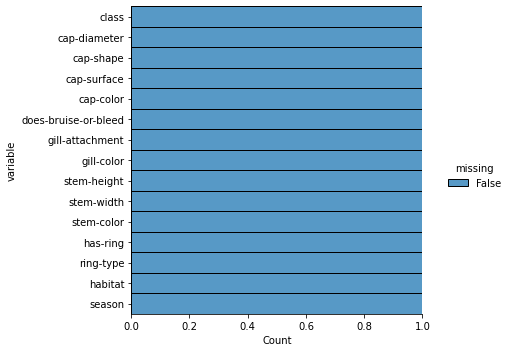

In [35]:
df['cap-surface'] = np.where(((df['cap-shape'] == 'b')), 
                                 df['cap-surface'].fillna('y'), 
                                 df['cap-surface'])

df['cap-surface'] = np.where(((df['cap-shape'] == 'c')), 
                                 df['cap-surface'].fillna('g'), 
                                 df['gill-attachment'])

df['cap-surface'] = np.where(((df['cap-shape'] == 'x')), 
                                 df['cap-surface'].fillna('s'), 
                                 df['cap-surface'])

df['cap-surface'] = np.where(((df['cap-shape'] == 'f')), 
                                 df['cap-surface'].fillna('s'), 
                                 df['cap-surface'])

df['cap-surface'] = np.where(((df['cap-shape'] == 's')), 
                                 df['cap-surface'].fillna('t'), 
                                 df['cap-surface'])

df['cap-surface'] = np.where(((df['cap-shape'] == 'p')), 
                                 df['cap-surface'].fillna('y'), 
                                 df['cap-surface'])

df['cap-surface'] = np.where(((df['cap-shape'] == 'o')), 
                                 df['cap-surface'].fillna('s'), 
                                 df['cap-surface'])

checkNullValues(df)


### Checking correlation among the predictor variables

In [36]:
# Pearson Correlation between Continous variables
# Since our target variable is binary class, we label encode target class as Poisnous -> 1, edible -> 0


<AxesSubplot:>

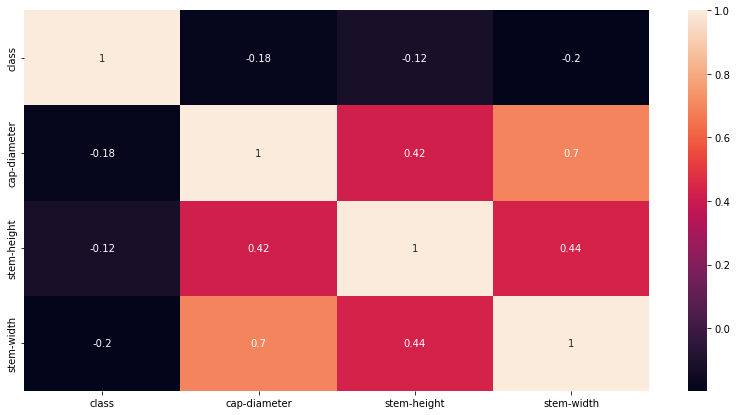

In [37]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['class']= label_encoder.fit_transform(df['class'])
  
df['class'].unique()

fig, ax = plt.subplots(figsize = (14, 7))
sns.heatmap(df.corr(), annot = True, ax = ax)


In [38]:
# It can be seen in the above graph that "stem-width" and "cap-diameter" are highly correlarted with each other
# Conclusion: We can keep, either stem-width or cap-diameter as they are highly correlated with each other,
# but "stem-width" has slightly high correlation with target variable
# Conclusion: therefore we will keep "stem-width" and drop "cap-diameter"

In [39]:
# Dummy encode the features
# make class datatype as int

df['class'] = df['class'].astype('int')
print("Before one hot encoding")
print(df.shape)

# One-Hot encoding the dataset
df = pd.get_dummies(df, drop_first=True)

print("After one hot encoding")
print(df.shape)

df.head()

Before one hot encoding
(61069, 15)
After one hot encoding
(61069, 80)


,class,cap-diameter,stem-height,stem-width,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
0,1,15.26,16.95,17.09,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,16.60,17.99,18.19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,14.07,17.80,17.74,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,14.17,15.77,15.98,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,14.64,16.53,17.20,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

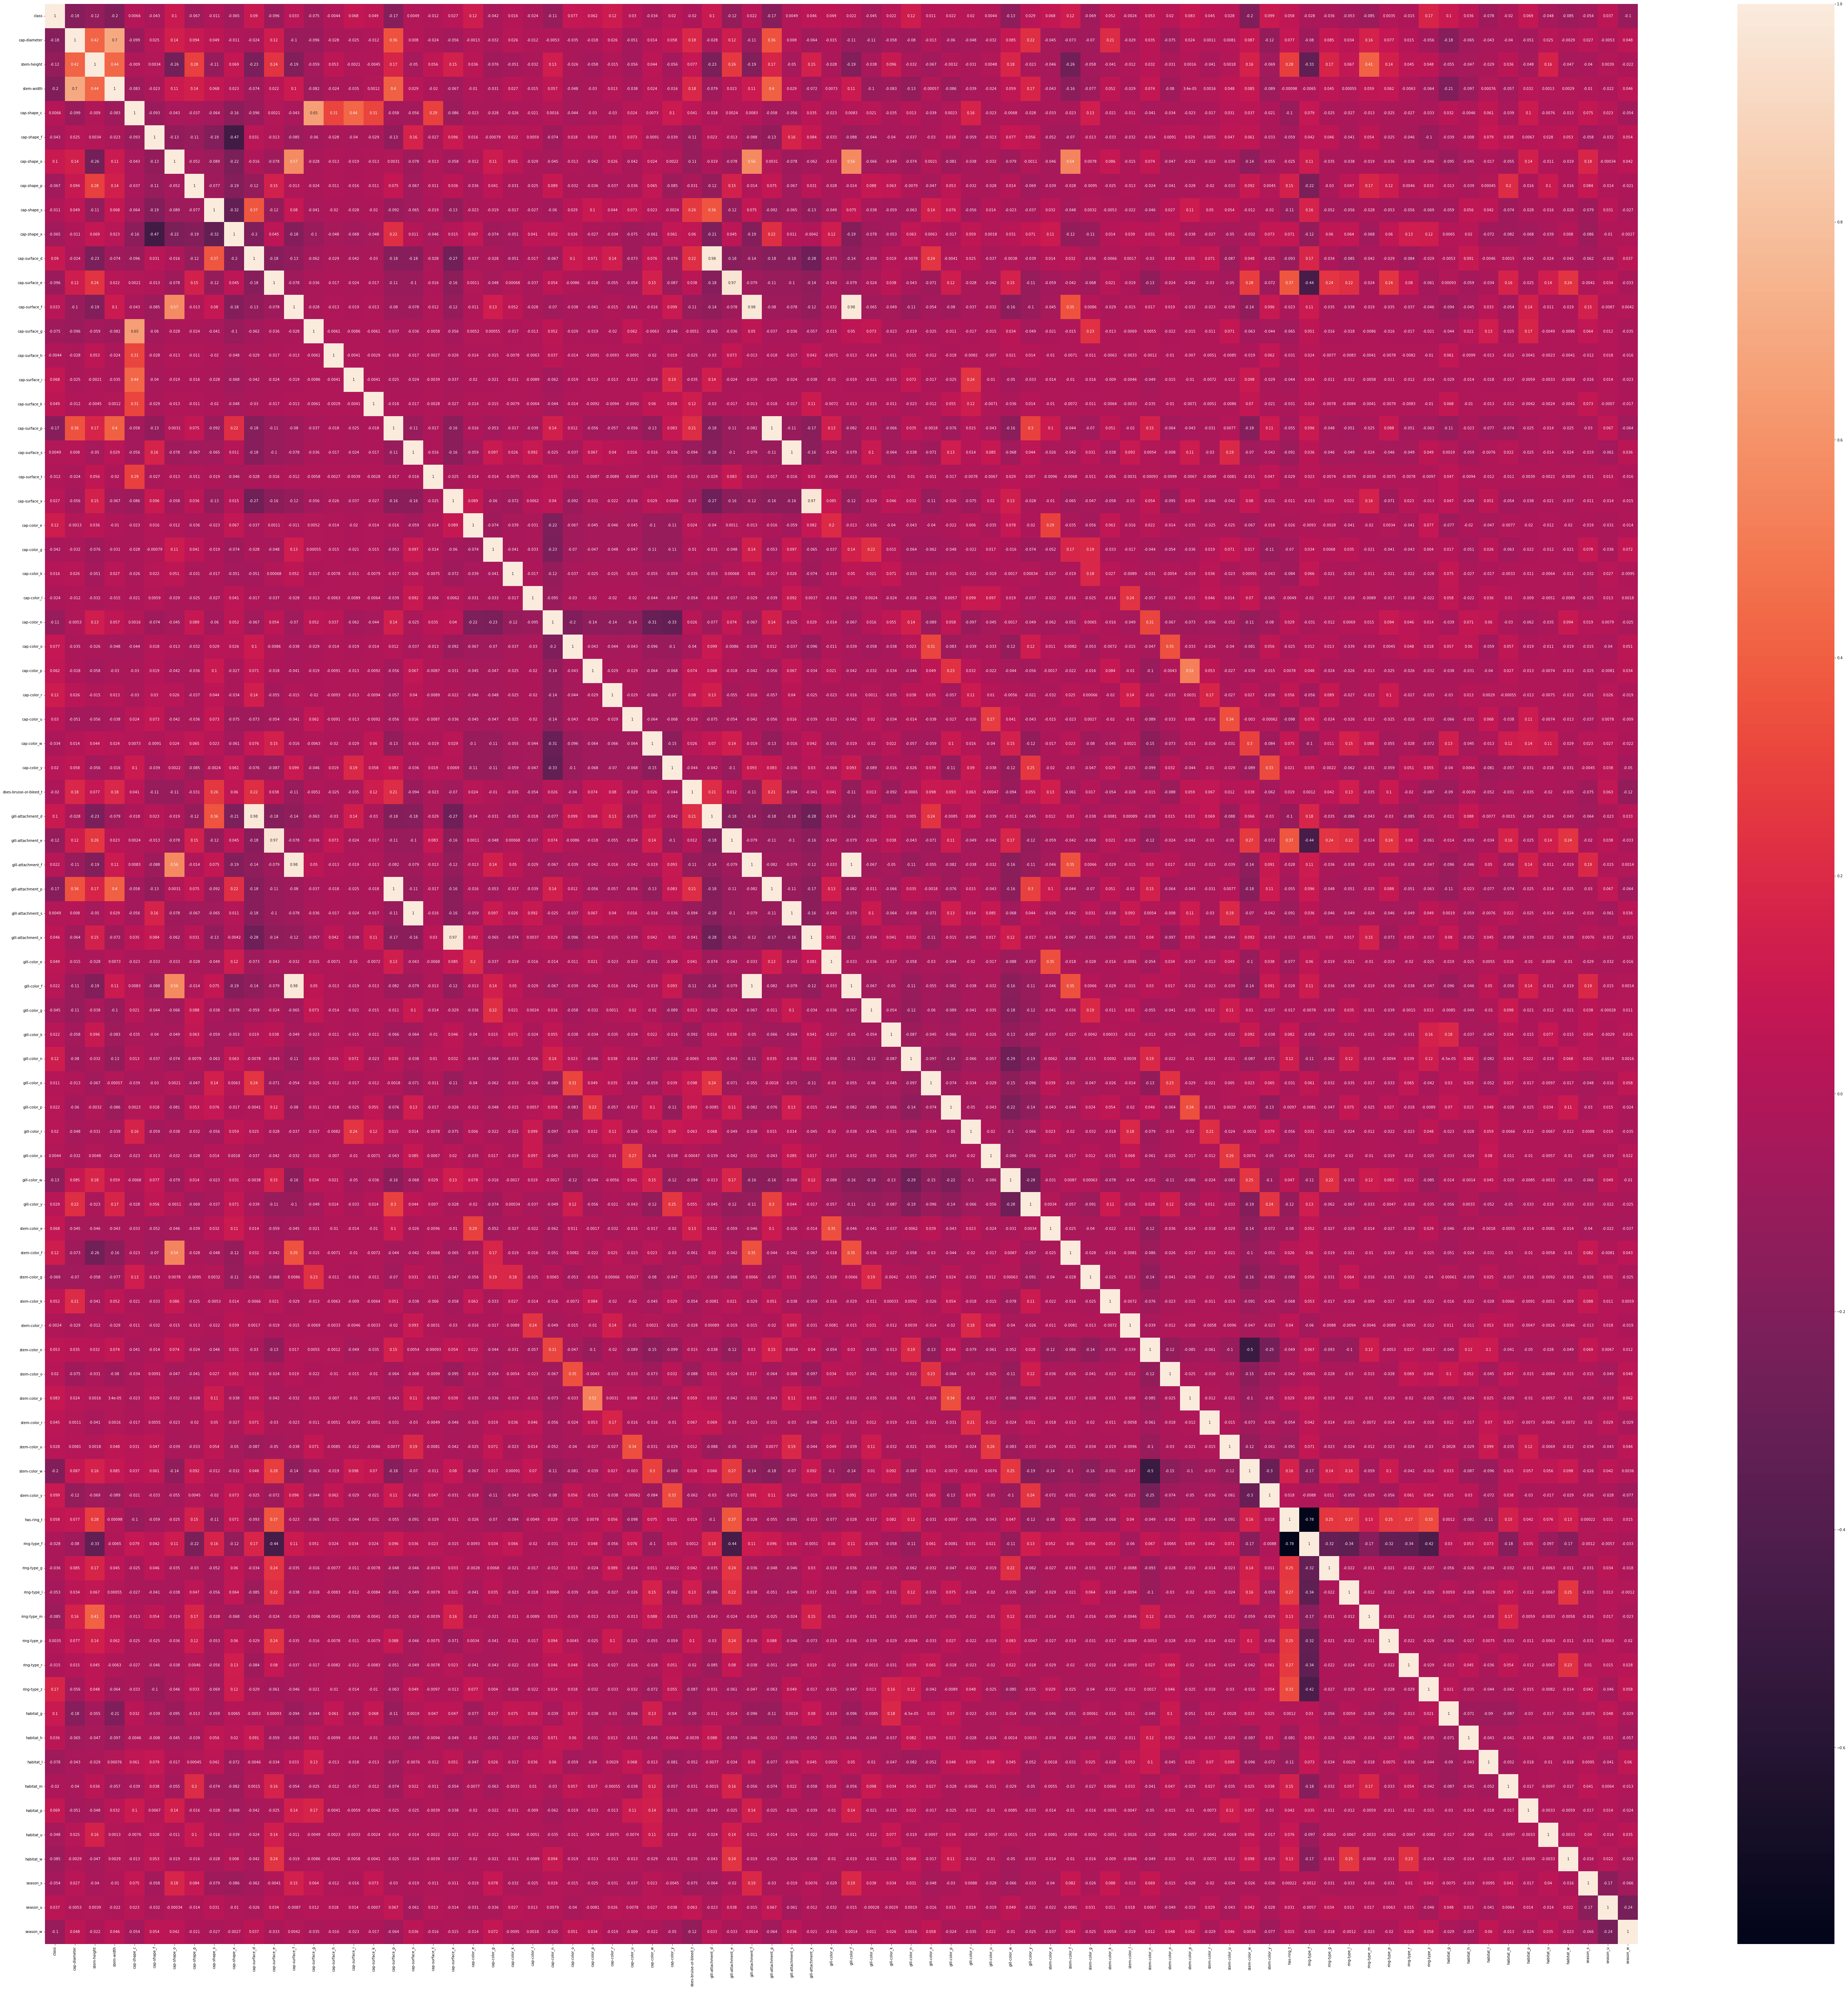

In [40]:
# checking correlation with target variable

fig, ax = plt.subplots(figsize = (100, 100))
sns.heatmap(df.corr(), annot = True)


In [41]:
# from the heatmap above we observe high correlation between the following categorical variables
# cap-surface_d - gill-attachment_d
# cap-surface_e - gill-attachment_e
# cap-surface_f - gill-attachment_f
# gill-color_f - cap-surface_f
# gill-attachment_p - cap-surface_p
# gill-attachment_s - cap-surface_s
# gill-attachment_x - cap-surface_x
# gill-color_f - gill-sttachment_f

In [42]:
# we can remove the following features as they have less correlation with class target column (some have same correlation with target column in which case I have chosen either of one):
# cap_surface-d
# gill_attachment-e
# gill_attachment-f
# gill_color-f
# gill_attachment-p
# gill_attachment-s
# cap_surface-x
